<a href="https://colab.research.google.com/github/johnkevinoregan/Learning-Relations-with-Deep-Learning/blob/main/Bright_dark_compar_w_shuffle_DONT_CHANGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bright vs dark comparison with generalization to different brightnesses and different retinal positions.

With option to shuffle the brightness metric.


19 Mar 2023

The purpose is to show that a NN cant learn to compare two brightnesses. You teach it to say "0" when the left of two pixels is brighter than the right and 1 otherwise. You train using the list X_train on just two retinal positions and one pair of brightnesses. In the training, both brightnesses trained occur at each retinal locations, so the NN cant use brightness to make its judgement, and must really rely on the comparison.

You then test it on a test list X_test, where the retinal positions are varied comparedd to the training set, and where the brightnesses are also varied.

If you set the option WhetherToShuffle=1, then all brightnesses between 0 and 255 will be permuted randomly, thereby destroying the natural intensity metric. We expect this to destroy the ability of the NN to generalize from the training brightnesses to nearby brightnesses.  

Results:
I'm a bit bothered by the variability of the results. The parameters I've used for the normal NN and CNN might not be ideal. Sometimes in the training you get immediate convergence to accuracy=1 and sometimes not. Even if accuracy =1, it seems that in the test set, the results for the training values may not be accurate! Have I not correctly understood what "accuracy=1" means?

But sometimes i can get results that are consistent with my hypotheses: For these:

### for normal NN: 
As seen from the smoothness of the plots as a fn of brightness, results for brightnesses near the training values resemble the training value results but get worse as brightnesses deviate from training brightness.

this is not so in the plots as a fn of retinal position. These are much more bumpy, showing that there is no natural metric along the retina.

But sometimes the results are not so clear.

### for CNN
Not so clear that the results generalize better over several retinal positions. But maybe I've misunderstood how to parameterize the CNN. I've put the number of filters=32... is that reasonable? I assume this number is the number of possible convolutions. I assume that the number of neurons in the input layer is equal to the retinal size? 

##Make training sets X_train and labels y_train

In [87]:
#initialize shuffler in case you want to destroy the natural brightness metric

def encode(array,shuff):
  [T,R]=np.shape(array)
  for t in range(T):
    for r in range(R):
      array[t]=shuff[array[t]]
  return(array)
import numpy as np

l=np.arange(255)

#these two arrays allow the brightness scale to be randomly permuted.
shuffler = np.random.permutation(len(l)) # returns indices to shuffle the list
undo_shuffler = np.argsort(shuffler) # returns indices to undo the shuffle

#to shuffle you do
#encode(array,shuffler)
#and to go back to original you do
#encode(array,undo_shuffler)



In [88]:
#prepare test and training sets

import numpy as np

#IMPORTANT !!
WhetherToShuffle=0
#IMPORTANT THE VALUE ABOVE DETERMINES WHETHER TO SHUFFLE THE BRIGHTNESS LEVELS RANDOMLY


RetSize=40
Left=int(RetSize/4)
Right=3*Left
TrainRepeats=3
Deltas=4 #number of deviations from base retinal positions used in test

W=3 #half the number of brightnesses in the test set
#the choice of the two training brightnesses will be the middle of the set (I think)
W2=2*W
#Brightnesses=np.arange(-W2,W2)*16+125-8 #this was a kludge. 

Brightnesses=(np.rint(np.linspace(0,255,W2+2))).astype(int)[1:-1] #it took me several hours to find this trick!

#print(Brightnesses)
LBrightnesses=len(Brightnesses)
#print('length',L)
X_test=np.zeros((LBrightnesses*(1+Deltas),RetSize),int)
y_test=np.zeros(LBrightnesses*(1+Deltas),int)
res_test=np.zeros(LBrightnesses*(1+Deltas),float)

X_train=np.zeros((2*TrainRepeats,RetSize),int)
y_train=np.zeros(2*TrainRepeats,int)
#print(X_train)

#used in plot routine:
LeftRetPosns=np.arange(Left-Deltas,Left+1)

trial=0
for DeltaPos in range(Deltas+1):
  for trial in range(LBrightnesses):
    T=trial+DeltaPos*LBrightnesses
    #print(T,Left-DeltaPos)
    X_test[T,Left-DeltaPos]=Brightnesses[trial]
    k=LBrightnesses-trial-1
    X_test[T,Right+DeltaPos]=Brightnesses[k]
    if X_test[T,Left-DeltaPos]<X_test[T,Right+DeltaPos]:
      y_test[T]=1
print('test stimuli')
print(X_test)
print('test labels')
print(y_test)

trial=0
while trial <= TrainRepeats+1:
  X_train[trial,Left]=Brightnesses[W]
  X_train[trial,Right]=Brightnesses[LBrightnesses-W-1]
  if X_train[trial,Left]<X_train[trial,Right]:
    y_train[trial]=1
  trial += 1
  X_train[trial,Left]=Brightnesses[LBrightnesses-W-1]
  X_train[trial,Right]=Brightnesses[W]
  if X_train[trial,Left]<X_train[trial,Right]:
    y_train[trial]=1
  trial +=1

print('training stimuli')
print(X_train)
print('training labels')
print(y_train)

if WhetherToShuffle==1:
  #only use this if you want to shuffle the brightness values
  encode(X_train,shuffler)
  print(X_train)
  encode(X_test,shuffler)
  print(X_test)

test stimuli
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
test labels
[1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0]
training stimuli
[[  0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 

## Train with normal NN

In [89]:
# Build, compile and train the neural network model
#there are two hidden layers with 64 and 32 values
#The ReLU activation function is used in deep learning models to introduce non-linearity into the network
#the sigmoid activation function produces a probability value between 0 and 1
from tensorflow import keras
import numpy as np
#from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.callbacks import EarlyStopping


model = keras.models.Sequential([
    keras.layers.Dense(RetSize, activation="relu", input_dim=len(X_train[0])),
    keras.layers.Dense(RetSize/2, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))
model.fit(X_train, y_train, epochs=100, batch_size=32)




Epoch 1/100
1/1 [==============================] - 1s 904ms/step - loss: 6.9752 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 5.5988 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 4.2557 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 3.0409 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 1.8487 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7837 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3295 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6413 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 1.0317 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2065 - accuracy: 0.5000
Epoch 11/100
1/1 [

# Test the model on the test data


In [90]:

for trial in range(len(X_test)):
  pred=model.predict(np.array([X_test[trial]]), verbose=0)
  res_test[trial]=pred[0][0]
  #print(np.around(pred[0][0],1),y_test[trial],X_test[trial])
  print(np.around(res_test[trial],2),y_test[trial],X_test[trial])

print(res_test)


1.0 1 [  0   0   0   0   0   0   0   0   0   0  36   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 219   0   0   0   0   0
   0   0   0   0]
1.0 1 [  0   0   0   0   0   0   0   0   0   0  73   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 182   0   0   0   0   0
   0   0   0   0]
1.0 1 [  0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0
   0   0   0   0]
0.0 0 [  0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0
   0   0   0   0]
0.0 0 [  0   0   0   0   0   0   0   0   0   0 182   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  73   0   0   0   0   0
   0   0   0   0]
0.0 0 [  0   0   0   0   0   0   0   0   0   0 219   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  36   0   0   0   0   

response 0 trained on brightnesses [146 109] at location 10


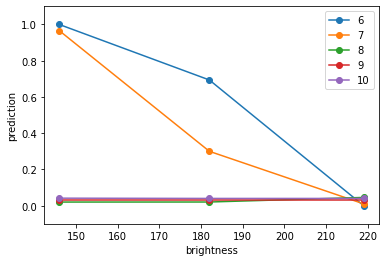


response 1 trained on brightnesses [109 146] at location 10


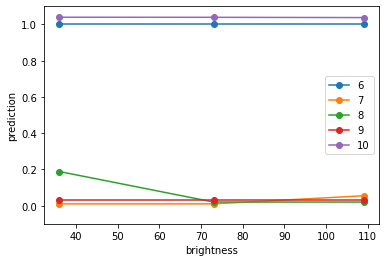

In [92]:
#Plot predictions in case response=0 as a fn of Brightnesses
#different lines are different retinal positions.

if WhetherToShuffle==1:
  encode(X_test,undo_shuffler)
  encode(X_train,undo_shuffler)


import matplotlib.pyplot as plt
for lab in range(2):
  Xlab=np.array(X_test[np.where(y_test==lab)])
  res_testlab=np.array(res_test[np.where(y_test==lab)])
  #print(Xlab)
  
  for retpos in LeftRetPosns:
    #get column of trials in Xlab corresponding to retpos
    temp=Xlab[:,retpos]
    #extract the nonzero ones
    inds=np.nonzero(temp)
    #print(inds)
    #get the brightnesses at those indices and use as x-coords
    xs=np.array(temp[inds])
    #and the predictions for those brightnesses as y-coords
    ys=res_testlab[inds]
    #print(xs)
    #print(ys)
    #plt.plot(xs,ys,label=retpos,marker="o",lw=retpos/2)
    jit=(retpos-Deltas-2)*Left/1000 #jitter for plotting to avoid overlaps
    #print(retpos,jit)
    plt.plot(xs,ys+jit,label=retpos,marker="o")
    #plt.plot(xs,ys,label=retpos,marker="o")
  print('response',lab, 'trained on brightnesses', X_train[lab,(Left,Right)], 'at location',Left)
  plt.legend(loc="best")
  plt.xlabel('brightness')
  plt.ylabel('prediction')
  plt.ylim([-0.1,1.1])
  plt.show()
  print()



response 0 trained on brightnesses [146 109] at location 10


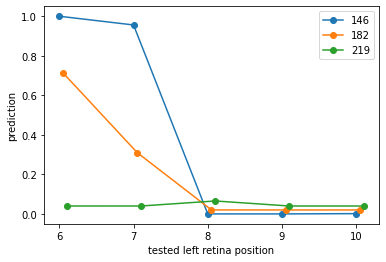


response 1 trained on brightnesses [109 146] at location 10


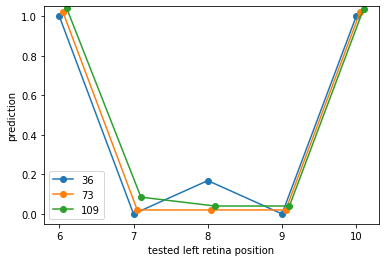

In [93]:
#Plot results as a function of retinal position

import matplotlib.pyplot as plt
for lab in range(2):
  Xlab=np.array(X_test[np.where(y_test==lab)])
  res_testlab=np.array(res_test[np.where(y_test==lab)])
  #print(Xlab)
  #extract list of brightesses from nonzero elements of column Left
  LeftCol=Xlab[:,Left]
  NewBrightnesses=LeftCol[np.nonzero(LeftCol)]
  LNewBrightnesses=len(NewBrightnesses)

  LLeftRetPosns=len(LeftRetPosns)
  Predicts=np.zeros((LNewBrightnesses,LLeftRetPosns),float)
  for trial in range(len(Xlab)):
      t=Xlab[trial]
      #get index of 1st nonzero elt --> retpos
      retpos=np.nonzero(t)[0][0]
      #get brightness at that retpos 
      B=t[retpos]
      #get index of that brightness in list of Brightnesses
      b=np.where(NewBrightnesses==B)[0][0]
      #get index of the retpos in the list of retposns
      r=np.where(LeftRetPosns==retpos)
      Predicts[b,r]=res_testlab[trial]

  for b in range(LNewBrightnesses):
    plt.plot(LeftRetPosns+0.05*b,Predicts[b,:]+0.02*b,label=NewBrightnesses[b],marker='o')
    #plt.plot(LeftRetPosns,Predicts[b,:],label=NewBrightnesses[b],marker='o',lw=b/2)

    plt.legend(loc="best")
    plt.xlabel('tested left retina position')
    plt.ylabel('prediction')
    plt.ylim([-0.05,1.05])

  
  print('response',lab, 'trained on brightnesses', X_train[lab,(Left,Right)], 'at location',Left)
  plt.show()
  print()




Comment on results:


## Train with CNN

In [103]:


if WhetherToShuffle==1:
  #only use this if you want to shuffle the brightness values
  encode(X_train,shuffler)
  print(X_train)
  encode(X_test,shuffler)
  print(X_test)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(len(X_train[0]), 1)))
model.add(MaxPooling1D(pool_size=4))
#model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(RetSize/2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

#loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
#print("Accuracy:", accuracy)

Epoch 1/40
1/1 [==============================] - 1s 890ms/step - loss: 1.4486 - accuracy: 0.5000
Epoch 2/40
1/1 [==============================] - 0s 14ms/step - loss: 0.3662 - accuracy: 1.0000
Epoch 3/40
1/1 [==============================] - 0s 14ms/step - loss: 0.8821 - accuracy: 0.5000
Epoch 4/40
1/1 [==============================] - 0s 14ms/step - loss: 0.6625 - accuracy: 0.5000
Epoch 5/40
1/1 [==============================] - 0s 11ms/step - loss: 0.2944 - accuracy: 1.0000
Epoch 6/40
1/1 [==============================] - 0s 12ms/step - loss: 0.3203 - accuracy: 1.0000
Epoch 7/40
1/1 [==============================] - 0s 12ms/step - loss: 0.4685 - accuracy: 0.5000
Epoch 8/40
1/1 [==============================] - 0s 13ms/step - loss: 0.3530 - accuracy: 1.0000
Epoch 9/40
1/1 [==============================] - 0s 13ms/step - loss: 0.1777 - accuracy: 1.0000
Epoch 10/40
1/1 [==============================] - 0s 12ms/step - loss: 0.1338 - accuracy: 1.0000
Epoch 11/40
1/1 [===========

###Test CNN 


In [104]:

for trial in range(len(X_test)):
  pred=model.predict(np.array([X_test[trial]]), verbose=0)
  res_test[trial]=pred[0][0]
  #print(np.around(pred[0][0],1),y_test[trial],X_test[trial])
  print(np.around(res_test[trial],1),y_test[trial],X_test[trial])

print(res_test)


1.0 1 [  0   0   0   0   0   0   0   0   0   0  36   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 219   0   0   0   0   0
   0   0   0   0]
1.0 1 [  0   0   0   0   0   0   0   0   0   0  73   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 182   0   0   0   0   0
   0   0   0   0]
1.0 1 [  0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0
   0   0   0   0]
0.0 0 [  0   0   0   0   0   0   0   0   0   0 146   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 109   0   0   0   0   0
   0   0   0   0]
0.0 0 [  0   0   0   0   0   0   0   0   0   0 182   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  73   0   0   0   0   0
   0   0   0   0]
0.0 0 [  0   0   0   0   0   0   0   0   0   0 219   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  36   0   0   0   0   

response 0 trained on brightnesses [146 109] at location 10


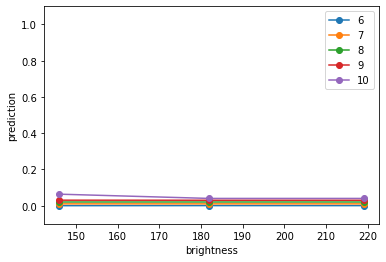


response 1 trained on brightnesses [109 146] at location 10


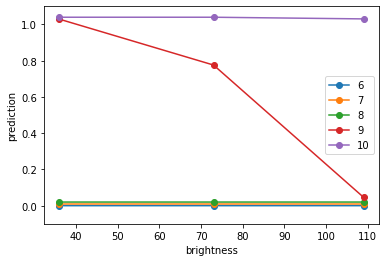

In [105]:
#Plot predictions in case response=0 as a fn of Brightnesses
#different lines are different retinal positions.

if WhetherToShuffle==1:
  encode(X_test,undo_shuffler)
  encode(X_train,undo_shuffler)


import matplotlib.pyplot as plt
for lab in range(2):
  Xlab=np.array(X_test[np.where(y_test==lab)])
  res_testlab=np.array(res_test[np.where(y_test==lab)])
  #print(Xlab)
  
  for retpos in LeftRetPosns:
    #get column of trials in Xlab corresponding to retpos
    temp=Xlab[:,retpos]
    #extract the nonzero ones
    inds=np.nonzero(temp)
    #print(inds)
    #get the brightnesses at those indices and use as x-coords
    xs=np.array(temp[inds])
    #and the predictions for those brightnesses as y-coords
    ys=res_testlab[inds]
    #print(xs)
    #print(ys)
    #plt.plot(xs,ys,label=retpos,marker="o",lw=retpos/2)
    jit=(retpos-Deltas-2)*Left/1000 #jitter for plotting to avoid overlaps
    #print(retpos,jit)
    plt.plot(xs,ys+jit,label=retpos,marker="o")
    #plt.plot(xs,ys,label=retpos,marker="o")
  print('response',lab, 'trained on brightnesses', X_train[lab,(Left,Right)], 'at location',Left)
  plt.legend(loc="best")
  plt.xlabel('brightness')
  plt.ylabel('prediction')
  plt.ylim([-0.1,1.1])
  plt.show()
  print()




response 0 trained on brightnesses [146 109] at location 10


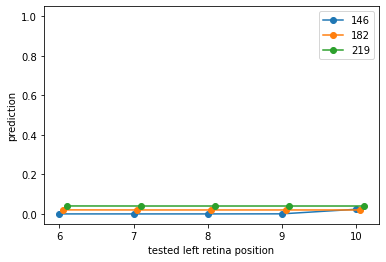


response 1 trained on brightnesses [109 146] at location 10


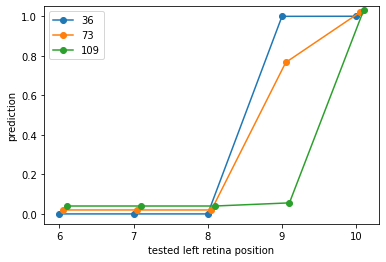

In [106]:
#Plot results as a function of retinal position

import matplotlib.pyplot as plt
for lab in range(2):
  Xlab=np.array(X_test[np.where(y_test==lab)])
  res_testlab=np.array(res_test[np.where(y_test==lab)])
  #print(Xlab)
  #extract list of brightesses from nonzero elements of column Left
  LeftCol=Xlab[:,Left]
  NewBrightnesses=LeftCol[np.nonzero(LeftCol)]
  LNewBrightnesses=len(NewBrightnesses)

  LLeftRetPosns=len(LeftRetPosns)
  Predicts=np.zeros((LNewBrightnesses,LLeftRetPosns),float)
  for trial in range(len(Xlab)):
      t=Xlab[trial]
      #get index of 1st nonzero elt --> retpos
      retpos=np.nonzero(t)[0][0]
      #get brightness at that retpos 
      B=t[retpos]
      #get index of that brightness in list of Brightnesses
      b=np.where(NewBrightnesses==B)[0][0]
      #get index of the retpos in the list of retposns
      r=np.where(LeftRetPosns==retpos)
      Predicts[b,r]=res_testlab[trial]

  for b in range(LNewBrightnesses):
    plt.plot(LeftRetPosns+0.05*b,Predicts[b,:]+0.02*b,label=NewBrightnesses[b],marker='o')
    #plt.plot(LeftRetPosns,Predicts[b,:],label=NewBrightnesses[b],marker='o',lw=b/2)

    plt.legend(loc="best")
    plt.xlabel('tested left retina position')
    plt.ylabel('prediction')
    plt.ylim([-0.05,1.05])

  
  print('response',lab, 'trained on brightnesses', X_train[lab,(Left,Right)], 'at location',Left)
  plt.show()
  print()



